# 12 Day Analysis Tools
## This file provides visualization on data of 12 day's data 
### Load the packages

In [1]:
from load import loadrec
import matplotlib.pyplot as plt
import json 

### Simple function loads the saved dict then counts total tweet number in the 12 files

In [2]:
dayrec=loadrec()

def sumlst(onelist):
    sum=0
    for x in onelist:
        sum+=x
    return sum
total=0  
total_apple=0
for day in dayrec.keys():
    if "apple" not in day:
        total+=sumlst(dayrec[day])
        
for day in dayrec.keys():
    if "apple" in day:
        total_apple+=sumlst(dayrec[day])
        
print("Total tweets:",total)

Total tweets: 3926391


### This function loads a date, then draw a pie chart according to that day's sentiment analysis

In [3]:
def pie_5dimen(key):
    lst=dayrec[key]
    labels = "neutral", "happy", "sad", "anger", "hate", "not understandable"
    counts = lst

    fig1, ax1 = plt.subplots()
    ax1.pie(counts, labels=labels, autopct='%1.0f%%',shadow=False, startangle=90)
    ax1.axis('equal')
    plt.title(key+"\n")
    plt.show()

### Draw all day's data

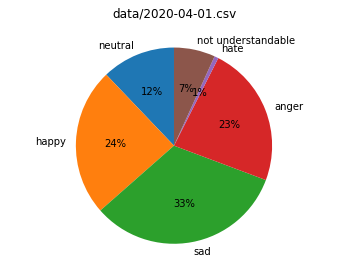

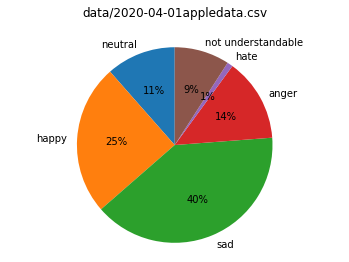

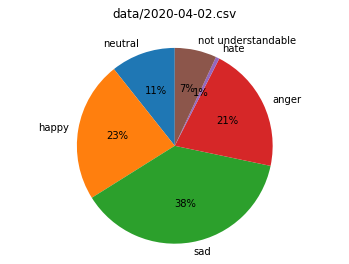

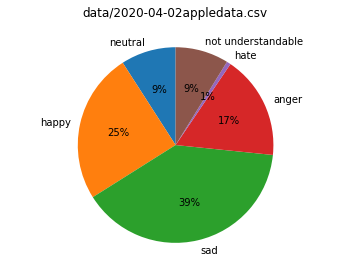

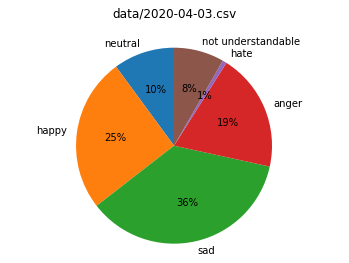

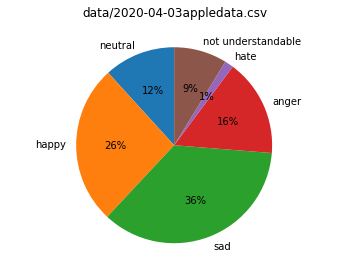

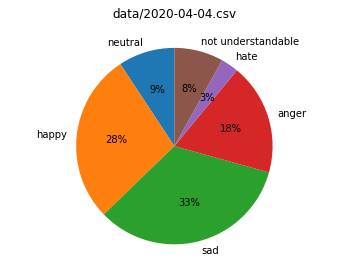

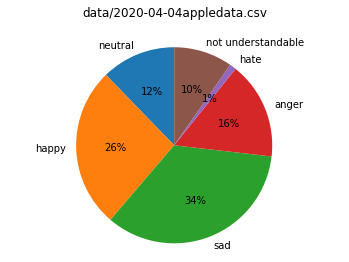

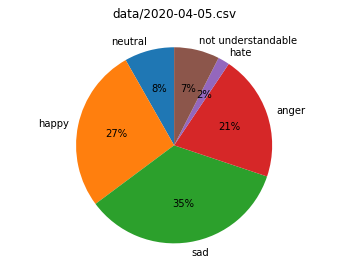

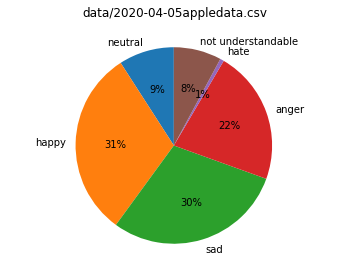

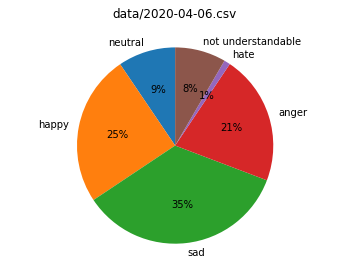

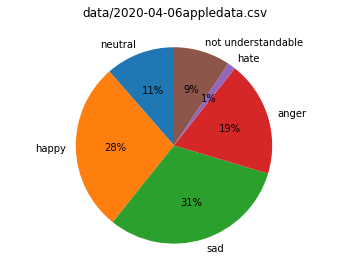

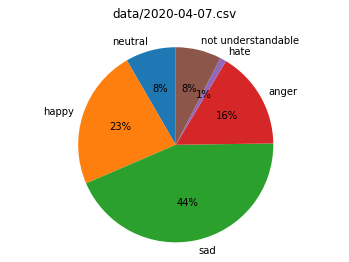

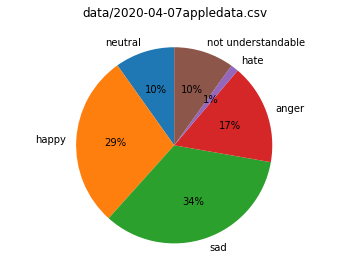

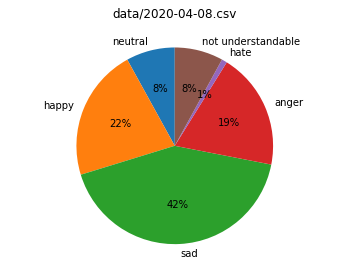

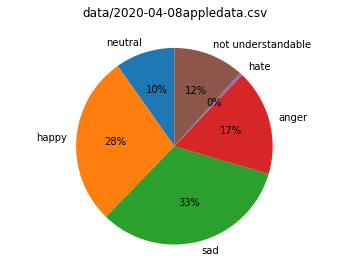

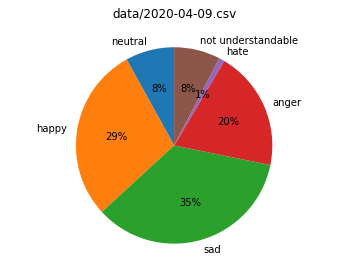

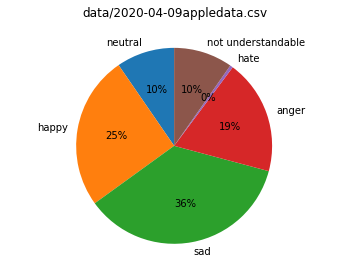

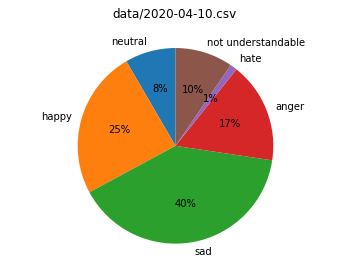

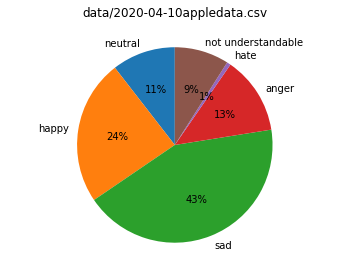

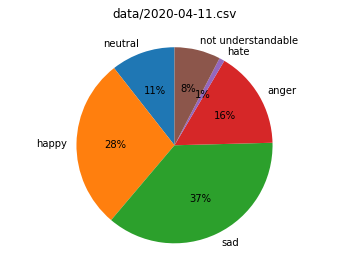

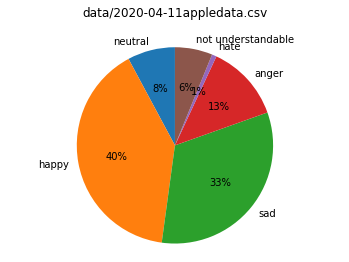

In [4]:
for keys in dayrec.keys():
    pie_5dimen(keys)

### This function reads the data file, calculates the apple topic tweets and total tweets, then return a percentile of apple topic in total tweets

In [5]:
import csv
def ratio(day):
    if day<10:
        day="0"+str(day)
    else:
        day=str(day)
    prefix="data/2020-04-"
    rec_24=[]
    t=0
    a=0
    with open(prefix+day+".csv", newline='') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            t+=1
    with open(prefix+day+"appledata"+".csv", newline='') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            a+=1
    return a/t

### This function call the function above and calculate each day apple topic's percentile, score them in a list and draw bar chart on each day's date

Wed 0.1970192737271978
Thu 0.19357112354006958
Fri 0.17749179519853817
Sat 0.19726701838134914
Sun 0.2468930613961982
Mon 0.26844146199818536
Tue 0.19804496684979245
Wed 0.1971176450299436
Thu 0.2180433285971671
Fri 0.28534344706532705
Sat 0.29776735573566465


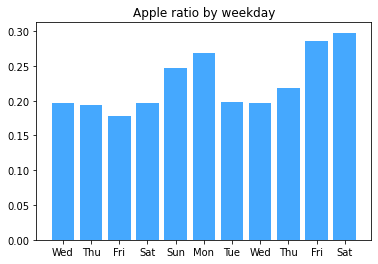

In [6]:
weekrec=[]
trec=[]
for i in range(1,12):
    weekdays=["Tue","Wed","Thu","Fri","Sat","Sun","Mon"]
    t=i%7
    weekrec.append(weekdays[t])
    trec.append(ratio(i))
    print(weekdays[i%7],ratio(i))
plt.bar(range(len(trec)), trec, color='#45a8fe')
plt.xticks(range(len(weekrec)), weekrec)
plt.title("Apple ratio by weekday")
plt.show()

### The following code calculates total composition of sad happy and anger tweets, print the comparison to screen

In [7]:
# neutral, happy, sad, anger, hate
sad=0
happy=0
anger=0
sad_a=0
happy_a=0
anger_a=0
for day in dayrec.keys():
    if "apple" not in day:
        sad+=dayrec[day][2]
        happy+=dayrec[day][1]
        anger+=dayrec[day][4]
    else:
        sad_a+=dayrec[day][2]
        happy_a+=dayrec[day][1]
        anger_a+=dayrec[day][4]
print("Total Sad Happy Anger",sad/total,happy/total,anger/total)
print("Apple Sad Happy Anger",sad_a/total_apple,happy_a/total_apple,anger_a/total_apple)




Total Sad Happy Anger 0.36992851705293744 0.2544122579743077 0.011503948536964351
Apple Sad Happy Anger 0.3535486980341227 0.2838265353451668 0.008746591942643342
